## About Data

This dataset contains about 10 years of daily weather observations from many locations across Australia. The target variable in this dataset is RainTomorrow. This dataset contains 23 columns and 145k rows.

The features (independent variables) are briefly describe below.

* **Data**: The date of observation
* **Location**: The common name of the location of the weather station
* **MinTemp**: The minimum temperature in degrees celsius
* **MaxTemp**: The maximum  temperature in degrees celsius
* **RainFall**: The amount of rainfall recorded for the day in mm
* **Evaporation**: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
* **Sunshine**: The number of hours of bright sunshine in the day.
* **WindGustDir**: The direction of the strongest wind gust in the 24 hours to midnight
* **WindGustSpeed**: The speed (km/h) of the strongest wind gust in the 24 hours to midnight
* **WindDir9am**: Direction of the wind at 9am
* **WindDir3pm**: Direction of the wind at 3pm
* **WindSpeed9am**: Wind speed (km/hr) averaged over 10 minutes prior to 9am
* **WindSpeed3pm**: Wind speed (km/hr) averaged over 10 minutes prior to 3pm
* **Humidity9am**: Humidity (percent) at 9am
* **Humidity3pm**: Humidity (percent) at 3pm
* **Pressure9am**: Atmospheric pressure (hpa) reduced to mean sea level at 9am
* **Pressure3pm**: Atmospheric pressure (hpa) reduced to mean sea level at 3pm
* **Cloud9am**: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths.
* **Cloud3pm**: Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm
* **Temp9am**: Temperature (degrees C) at 9am
* **Temp3pm**: Temperature (degrees C) at 3pm
* **RainToday**: Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting theme of all the plots
sns.set_theme(style="darkgrid")
# Display all columns
pd.set_option('max_columns', None)
# Displays all rows 
pd.set_option('display.max_rows',None)


In [2]:
data = pd.read_csv("./weatherAUS.csv")
data.head() # Checking first five rows of data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# Getting info about datatypes and count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
# Statistical summary of continuous data
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
# Storing column names
columns = data.columns

In [6]:
# Checking unique values of each feature
columnsUnique = data.nunique()
columnsUnique

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [7]:
# Seperating categorical data and continuous data
cat_data = [] # For categorical data
cont_data = [] # For continuous data

for col_name in columns:
    if data[col_name].dtypes == 'O': # If object type
        cat_data.append(col_name)
    else:
        cont_data.append(col_name)
        
print("Categorical Data -->", cat_data)
print("Continuous Data -->", cont_data)

Categorical Data --> ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Continuous Data --> ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [8]:
print(f"The data has {data.shape[0]} samples and {data.shape[1]} features.")


The data has 145460 samples and 23 features.


In [9]:
# Checking amount of null data in each feature
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

## Exploratory Data Analysis

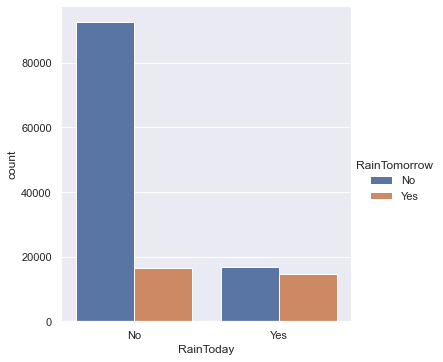

In [12]:
# Plotting count of RainToday with legend of RainTomorrow
sns.catplot(x="RainToday", kind="count", data=data, hue="RainTomorrow");

<span style="font-size:16px; padding:10px;"> **Inference:** If there is no rain today, it is less likely to rain tomorrow and if it rains today, it is likely to rain tomorrow.</span>

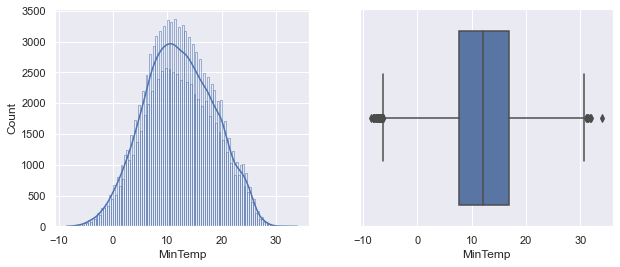

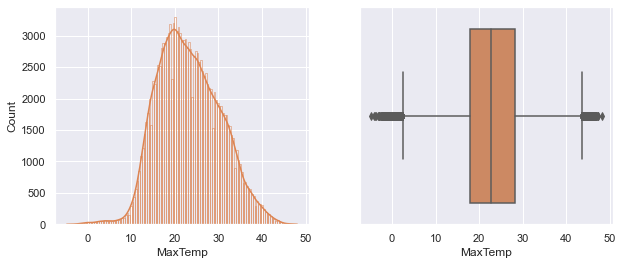

In [13]:
# Storing basic seaborn color palette
colors = sns.color_palette()

# Plotting histogram and box plots

fig, (ax1, ax2) = plt.subplots(figsize = (10,4), ncols=2)
sns.histplot(data=data, x="MinTemp", fill=False, kde=True, ax=ax1, color=colors[0]);
sns.boxplot(data=data, x="MinTemp", ax = ax2, color=colors[0]);

fig, (ax1, ax2) = plt.subplots(figsize = (10,4), ncols=2)
sns.histplot(data=data, x="MaxTemp", fill=False, kde=True, ax=ax1, color=colors[1]);
sns.boxplot(data=data, x="MaxTemp", ax = ax2, color=colors[1]);

<span style="font-size:16px; padding:10px;"> **Inference:** Normally distributed with some outliers.</span>

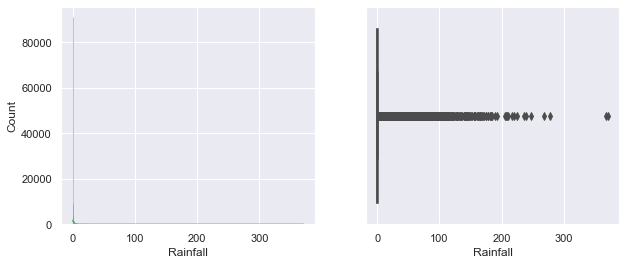

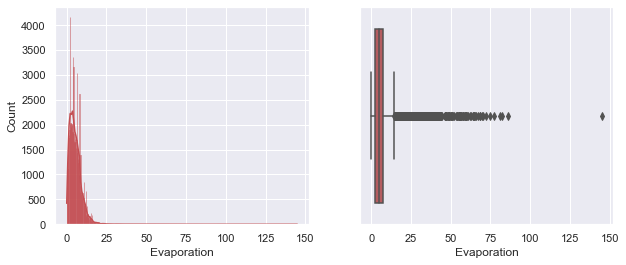

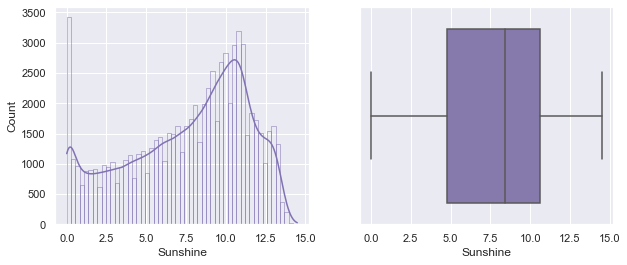

In [14]:
fig, (ax1, ax2) = plt.subplots(figsize = (10,4), ncols=2)
sns.histplot(data=data, x="Rainfall", fill=False, kde=True, ax=ax1, color=colors[2]);
sns.boxplot(data=data, x="Rainfall", ax = ax2, color=colors[2]);

fig, (ax1, ax2) = plt.subplots(figsize = (10,4), ncols=2)
sns.histplot(data=data, x="Evaporation", fill=False, kde=True, ax=ax1, color=colors[3]);
sns.boxplot(data=data, x="Evaporation", ax = ax2, color=colors[3]);

fig, (ax1, ax2) = plt.subplots(figsize = (10,4), ncols=2)
sns.histplot(data=data, x="Sunshine", fill=False, kde=True, ax=ax1, color=colors[4]);
sns.boxplot(data=data, x="Sunshine", ax = ax2, color=colors[4]);

<span style="font-size:16px; padding:10px;"> **Inference:** Rainfall and Evaporation seem to be postively skewed and have a lot of outliers.</span>

In [15]:
# Counts of empty data
print("Rainfall->", data["Rainfall"].isna().sum())
print("Evaporation->", data["Evaporation"].isna().sum())
print("Sunshine->", data["Sunshine"].isna().sum())

Rainfall-> 3261
Evaporation-> 62790
Sunshine-> 69835


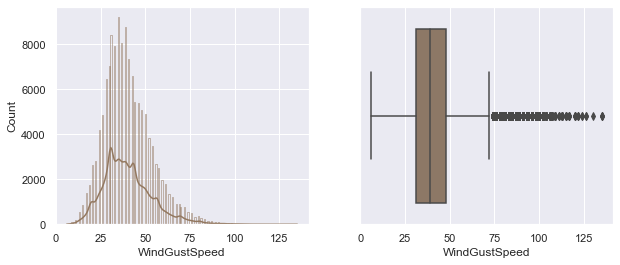

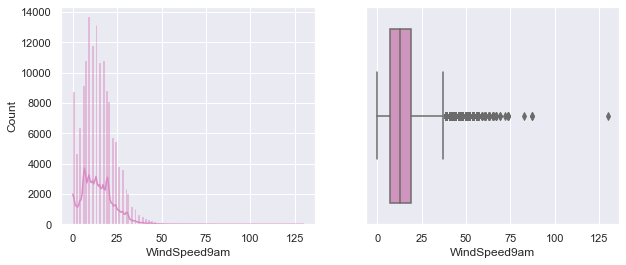

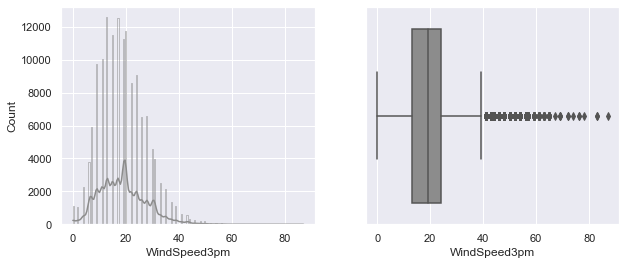

In [16]:
fig, (ax1, ax2) = plt.subplots(figsize = (10,4), ncols=2)
sns.histplot(data=data, x="WindGustSpeed", fill=False, kde=True, ax=ax1, color=colors[5]);
sns.boxplot(data=data, x="WindGustSpeed", ax = ax2, color=colors[5]);

fig, (ax1, ax2) = plt.subplots(figsize = (10,4), ncols=2)
sns.histplot(data=data, x="WindSpeed9am", fill=False, kde=True, ax=ax1, color=colors[6]);
sns.boxplot(data=data, x="WindSpeed9am", ax = ax2, color=colors[6]);

fig, (ax1, ax2) = plt.subplots(figsize = (10,4), ncols=2)
sns.histplot(data=data, x="WindSpeed3pm", fill=False, kde=True, ax=ax1, color=colors[7]);
sns.boxplot(data=data, x="WindSpeed3pm", ax = ax2, color=colors[7]);

<span style="font-size:16px; padding:10px;"> **Inference:** All of them are positively skewed with some outliers.</span>

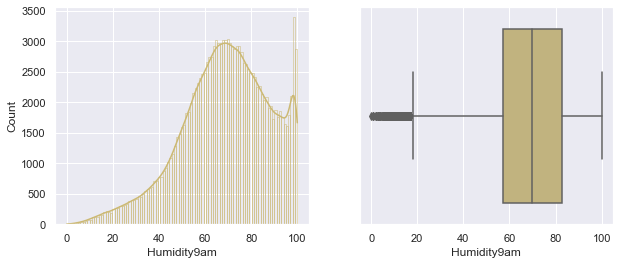

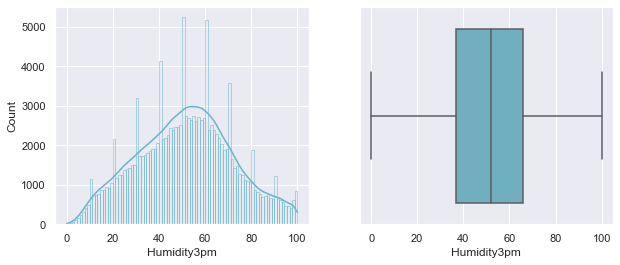

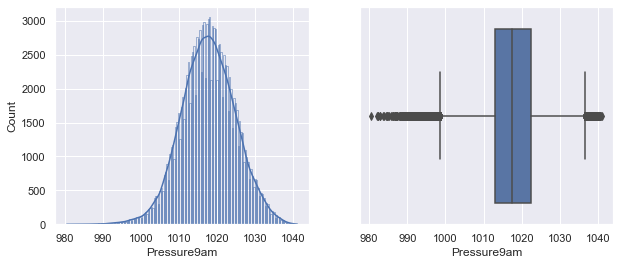

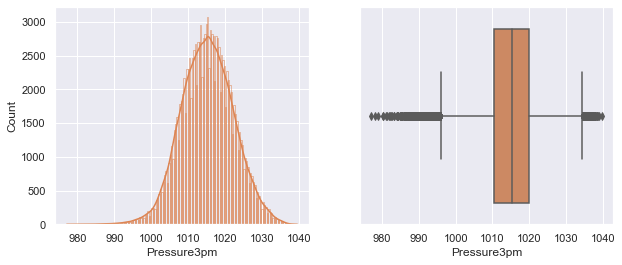

In [17]:
fig, (ax1, ax2) = plt.subplots(figsize = (10,4), ncols=2)
sns.histplot(data=data, x="Humidity9am", fill=False, kde=True, ax=ax1, color=colors[8]);
sns.boxplot(data=data, x="Humidity9am", ax = ax2, color=colors[8]);

fig, (ax1, ax2) = plt.subplots(figsize = (10,4), ncols=2)
sns.histplot(data=data, x="Humidity3pm", fill=False, kde=True, ax=ax1, color=colors[9]);
sns.boxplot(data=data, x="Humidity3pm", ax = ax2, color=colors[9]);


fig, (ax1, ax2) = plt.subplots(figsize = (10,4), ncols=2)
sns.histplot(data=data, x="Pressure9am", fill=False, kde=True, ax=ax1, color=colors[0]);
sns.boxplot(data=data, x="Pressure9am", ax = ax2, color=colors[0]);

fig, (ax1, ax2) = plt.subplots(figsize = (10,4), ncols=2)
sns.histplot(data=data, x="Pressure3pm", fill=False, kde=True, ax=ax1, color=colors[1]);
sns.boxplot(data=data, x="Pressure3pm", ax = ax2, color=colors[1]);

<span style="font-size:16px; padding:10px;"> **Inference:** Normally distributed with many outliers in Pressure9am and Pressure3pm.</span>

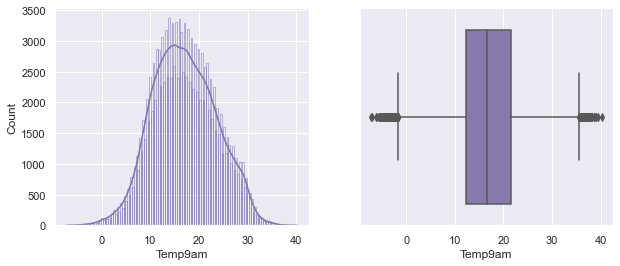

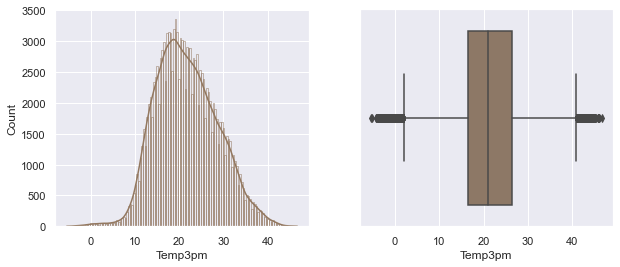

In [18]:


fig, (ax1, ax2) = plt.subplots(figsize = (10,4), ncols=2)
sns.histplot(data=data, x="Temp9am", fill=False, kde=True, ax=ax1, color=colors[4]);
sns.boxplot(data=data, x="Temp9am", ax = ax2, color=colors[4]);

fig, (ax1, ax2) = plt.subplots(figsize = (10,4), ncols=2)
sns.histplot(data=data, x="Temp3pm", fill=False, kde=True, ax=ax1, color=colors[5]);
sns.boxplot(data=data, x="Temp3pm", ax = ax2, color=colors[5]);

<span style="font-size:16px; padding:10px;"> **Inference:** Normally distributed with outliers.</span>

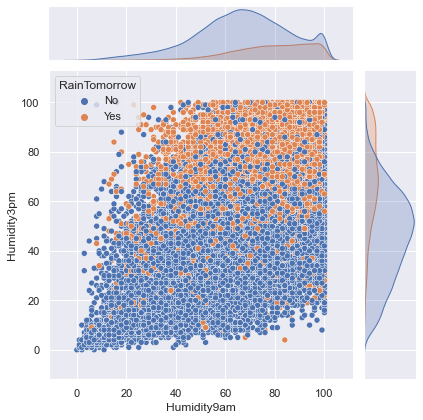

In [19]:
# Scatterplotting humidities
sns.jointplot(data=data, x="Humidity9am", y="Humidity3pm", hue="RainTomorrow");


<span style="font-size:16px; padding:10px;"> **Inference:** It is much more likely to rain tommorow if there is high humidity.</span>

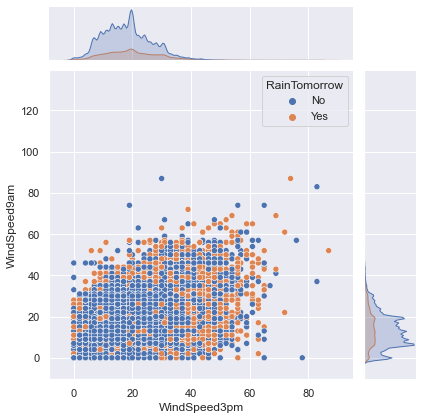

In [20]:

sns.jointplot(data=data, x="WindSpeed3pm", y="WindSpeed9am", hue="RainTomorrow");

<span style="font-size:16px; padding:10px;"> **Inference:** More windspeed yeilds high chance of rainfall next day.</span>

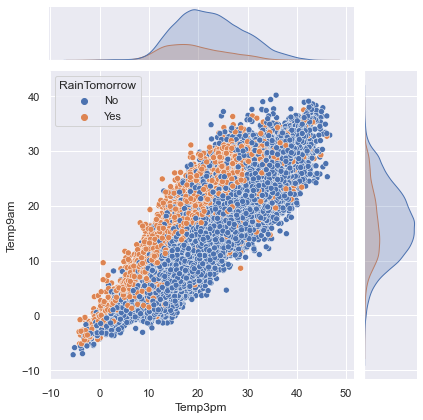

In [21]:
sns.jointplot(data=data, x="Temp3pm", y="Temp9am", hue="RainTomorrow");

<span style="font-size:16px; padding:10px;"> **Inference:** If temperature decreases from 9am to 3pm, it is much more likely to rain.</span>

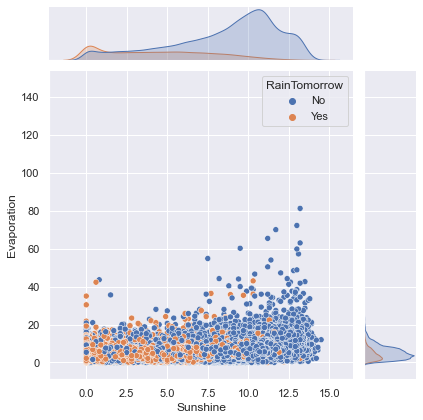

In [22]:
sns.jointplot(data=data, x="Sunshine", y="Evaporation", hue="RainTomorrow");

<span style="font-size:16px; padding:10px;"> **Inference:** Less sunshine results in high chance of rain tomorrow.</span>

## Data Cleaning and Manipulation

In [23]:
# Reading data again for fresh data
data = pd.read_csv("./weatherAUS.csv")
data.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [24]:
# Checking null values of categorical data
data[cat_data].isna().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [25]:
# Seperating Date columns into three different columns -> year, month and day
data["Year"] = pd.DatetimeIndex(data["Date"]).year
data["Month"] = pd.DatetimeIndex(data["Date"]).month
data["Data"] = pd.DatetimeIndex(data["Date"]).day
data.drop(["Date"], axis=1, inplace=True)

In [26]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Data
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [27]:
# Getting unique values of Location column
data["Location"].value_counts()

Canberra            3436
Sydney              3344
Brisbane            3193
Adelaide            3193
Melbourne           3193
Hobart              3193
Perth               3193
Darwin              3193
Bendigo             3040
GoldCoast           3040
MountGinini         3040
Albury              3040
AliceSprings        3040
Albany              3040
Ballarat            3040
Townsville          3040
MountGambier        3040
Launceston          3040
Cairns              3040
Wollongong          3040
Tuggeranong         3039
Newcastle           3039
Penrith             3039
Watsonia            3009
Sale                3009
Dartmoor            3009
PerthAirport        3009
BadgerysCreek       3009
PearceRAAF          3009
Cobar               3009
Witchcliffe         3009
SydneyAirport       3009
CoffsHarbour        3009
Mildura             3009
Nuriootpa           3009
Moree               3009
WaggaWagga          3009
Williamtown         3009
Portland            3009
Richmond            3009


The data is uniformly distributed among different locations.

One Hot Encoding instead of label encoding because label encoding results in value ranging from 0 - no. of classes. Higher numbers results in higher number being given more emphasis while find weights and biases whereas when one hot encoding, the data is either 0 or 1.

In [28]:
# Getting a dataframe dummy with one-hot encoded columns
dummy = pd.get_dummies(data["Location"], drop_first=True)

In [29]:
# Adding the dummy data to the main dataframe
data= pd.concat([data, dummy], axis=1)
# Removing the old location column
data.drop(["Location"],inplace=True, axis=1)
data.head()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Data,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**WindGustDir**

Since this column has 10k empty rows, it is better to one hot encode while keeping the NaN values instead of simply dropping it.

In [30]:
dummy = pd.get_dummies(data["WindGustDir"], drop_first=True, dummy_na=True, prefix="windGustDir") # Make new column for NaN values
data= pd.concat([data, dummy], axis=1)
data.drop(["WindGustDir"],inplace=True, axis=1)
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Data,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,windGustDir_ENE,windGustDir_ESE,windGustDir_N,windGustDir_NE,windGustDir_NNE,windGustDir_NNW,windGustDir_NW,windGustDir_S,windGustDir_SE,windGustDir_SSE,windGustDir_SSW,windGustDir_SW,windGustDir_W,windGustDir_WNW,windGustDir_WSW,windGustDir_nan
0,13.4,22.9,0.6,NaN,NaN,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,7.4,25.1,0.0,NaN,NaN,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,12.9,25.7,0.0,NaN,NaN,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,9.2,28.0,0.0,NaN,NaN,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,NaN,NaN,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


**WindDir9am**

This columns also has a large number of missing data, so we can employ the same method of one hot encoding.

In [31]:
dummy = pd.get_dummies(data["WindDir9am"], drop_first=True, dummy_na=True, prefix="WindDir9am") # Make new column for NaN values
data= pd.concat([data, dummy], axis=1)
data.drop(["WindDir9am"],inplace=True, axis=1)
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Data,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,windGustDir_ENE,windGustDir_ESE,windGustDir_N,windGustDir_NE,windGustDir_NNE,windGustDir_NNW,windGustDir_NW,windGustDir_S,windGustDir_SE,windGustDir_SSE,windGustDir_SSW,windGustDir_SW,windGustDir_W,windGustDir_WNW,windGustDir_WSW,windGustDir_nan,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan
0,13.4,22.9,0.6,NaN,NaN,44.0,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,7.4,25.1,0.0,NaN,NaN,44.0,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,NaN,NaN,46.0,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9.2,28.0,0.0,NaN,NaN,24.0,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,17.5,32.3,1.0,NaN,NaN,41.0,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**WindDir3pm**

This columns also has a large number of missing data, so we can employ the same method of one hot encoding.

In [32]:
dummy = pd.get_dummies(data["WindDir3pm"], drop_first=True, dummy_na=True, prefix="WindDir3pm") # Make new column for NaN values
data= pd.concat([data, dummy], axis=1)
data.drop(["WindDir3pm"],inplace=True, axis=1)
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Data,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,windGustDir_ENE,windGustDir_ESE,windGustDir_N,windGustDir_NE,windGustDir_NNE,windGustDir_NNW,windGustDir_NW,windGustDir_S,windGustDir_SE,windGustDir_SSE,windGustDir_SSW,windGustDir_SW,windGustDir_W,windGustDir_WNW,windGustDir_WSW,windGustDir_nan,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


**RainToday**

This columns also has a large number of missing data, so we can employ the same method of one hot encoding.

In [33]:
dummy = pd.get_dummies(data["RainToday"], drop_first=True, dummy_na=True, prefix="RainToday") # Make new column for NaN values
data= pd.concat([data, dummy], axis=1)
data.drop(["RainToday"],inplace=True, axis=1)
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,Year,Month,Data,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,windGustDir_ENE,windGustDir_ESE,windGustDir_N,windGustDir_NE,windGustDir_NNE,windGustDir_NNW,windGustDir_NW,windGustDir_S,windGustDir_SE,windGustDir_SSE,windGustDir_SSW,windGustDir_SW,windGustDir_W,windGustDir_WNW,windGustDir_WSW,windGustDir_nan,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_Yes,RainToday_nan
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,2008,12,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,2008,12,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,2008,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,2008,12,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,2008,12,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


**RainTomorrow**

Since this is the target variable, the best option would to be drop the empty rows.

In [34]:
# Dropping rows with null target value
data = data.dropna(subset = ['RainTomorrow'])
data["RainTomorrow"].isna().sum()

0

In [35]:
# Checking null values of continous data
data[cont_data].isna().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
dtype: int64

Filling the empty rows with median instead of dropping. Dropping would result in loss of valuable data. Using median instead of mean because the data is skewed

In [36]:
# Replacing empty data wiht median for each of continuous features
for col_name in cont_data:
    data[col_name].fillna(data[col_name].median(), inplace = True)

In [37]:
# Creating a function that returns lower and upper limit to remove outliers
def outliers(df, feature):
    Q1= df[feature].quantile(0.25) # First Quartile
    Q3 = df[feature].quantile(0.75) # Third Quartile
    IQR = Q3 - Q1 # Inter Quartile Range
    upper_limit = Q3 + 1.5 * IQR # Upper Lim
    lower_limit = Q1 - 1.5 * IQR # Lower Lim
    return upper_limit, lower_limit

In [38]:
# Since the following features had many outliers, removing the outliers in the following columns
for col_name in ['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']:
    # getting upper and lower limit
    upper, lower = outliers(data, col_name)
    # filtering data with range of lower and upper limit
    data = data[(data[col_name] > lower) & (data[col_name] < upper)]
    
    

In [39]:
print(f"After data cleaning, the datafram now has {data.shape[0]} columns and {data.shape[1]} rows.")


After data cleaning, the datafram now has 76955 columns and 118 rows.


## Model Training and Evaluation

In [40]:
from sklearn.model_selection import train_test_split

# Seperating feature variables and target variable
X = data.drop(['RainTomorrow'], axis = 1) # Features
y = data['RainTomorrow'] # Target

# train_test_split shuffles the data and splits the data for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Logistic Regression

Logistic Regression is a classification algorithm based on the sigmoid function.


$g(z) = \frac{1}{1 + e^{-z}}$


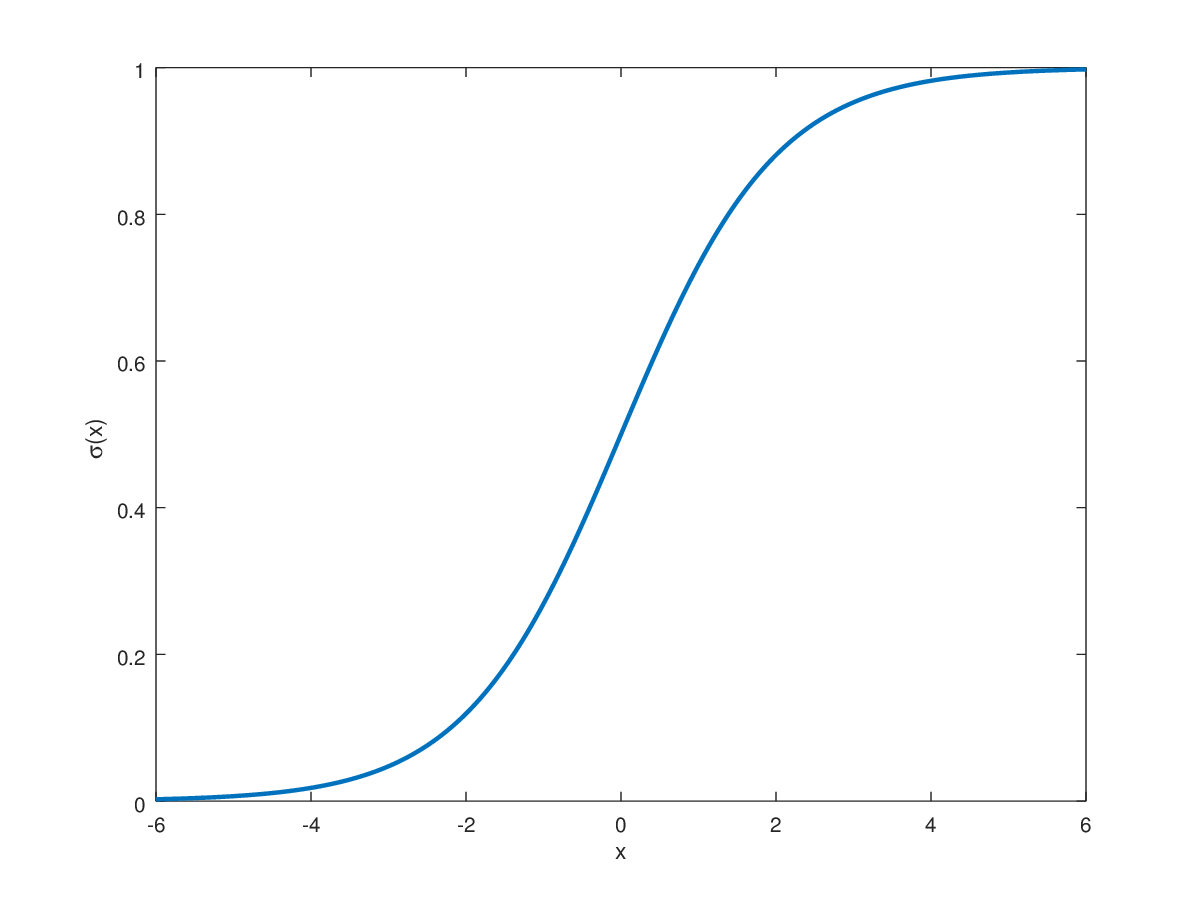

A sigmoid function squeezes numbers in range [ -inf, +inf ] to [ 0, 1 ]. Logistic Regression uses regression to find the possiblity of something being in a particular class.

The hypothesis for this function is:


$h_{\Theta}(x) = g(\Theta^{T}x)$



$h_{\Theta}(x) = \frac{1}{1 + e^{-\Theta^{T}x}}  where$


$\Theta^{T}x = \Theta_{0}x_{0} + \Theta_{1}x_{1} + ... + \Theta_{n}x_{n}$

$x_{0}, x_{1}, . . . , x_{n}$ represents features

$\Theta_{0}, \Theta_{1}, . . . , \Theta_{n}$ represents weights which we are trying to calculate


The main objective of logistic regression is to find values of thetas so that all the features correctly map to their target. 

### Loss Function

In order to do that, we need to define a loss function. A loss funcition determines how far off our model if from the actual value. For logistic regression, cross-entropy cost function is used.

$J(\theta) = \frac{1}{m} \sum_{i=1}^{m}[-y \log(h_{\theta}(x)) - (1-y)\log(1-h_{\theta}(x))]$


### Gradient Descent

We need to bring the value of our cost function to as close to 0 as we can. In order to do that we use a minimization algorithm called gradient descent.

When we take the derivative of the cost function with respect to any of the feature, the output value tells us what step we need to take (what value to increase or decrease from the weight) in order to maxmize the function. If we take the negative of that value, it guides us to the value of weight that results in minimum weight. The value which we get from taking the derivative is multiplied with a small number to take smaller steps. The number we multiply it with is called the learning rate.

$\Theta_{j} := \Theta_{j} - \alpha \frac{\partial }{\partial\Theta_{j}} J(\Theta_{0}, \Theta_{1}, ... , \theta_{n})$ (simultaneously update $\Theta_{j}$ for all $j$)

$\alpha$ is the learning rate.

$\Theta$ are the weights

$J(\Theta)$ is the loss function.






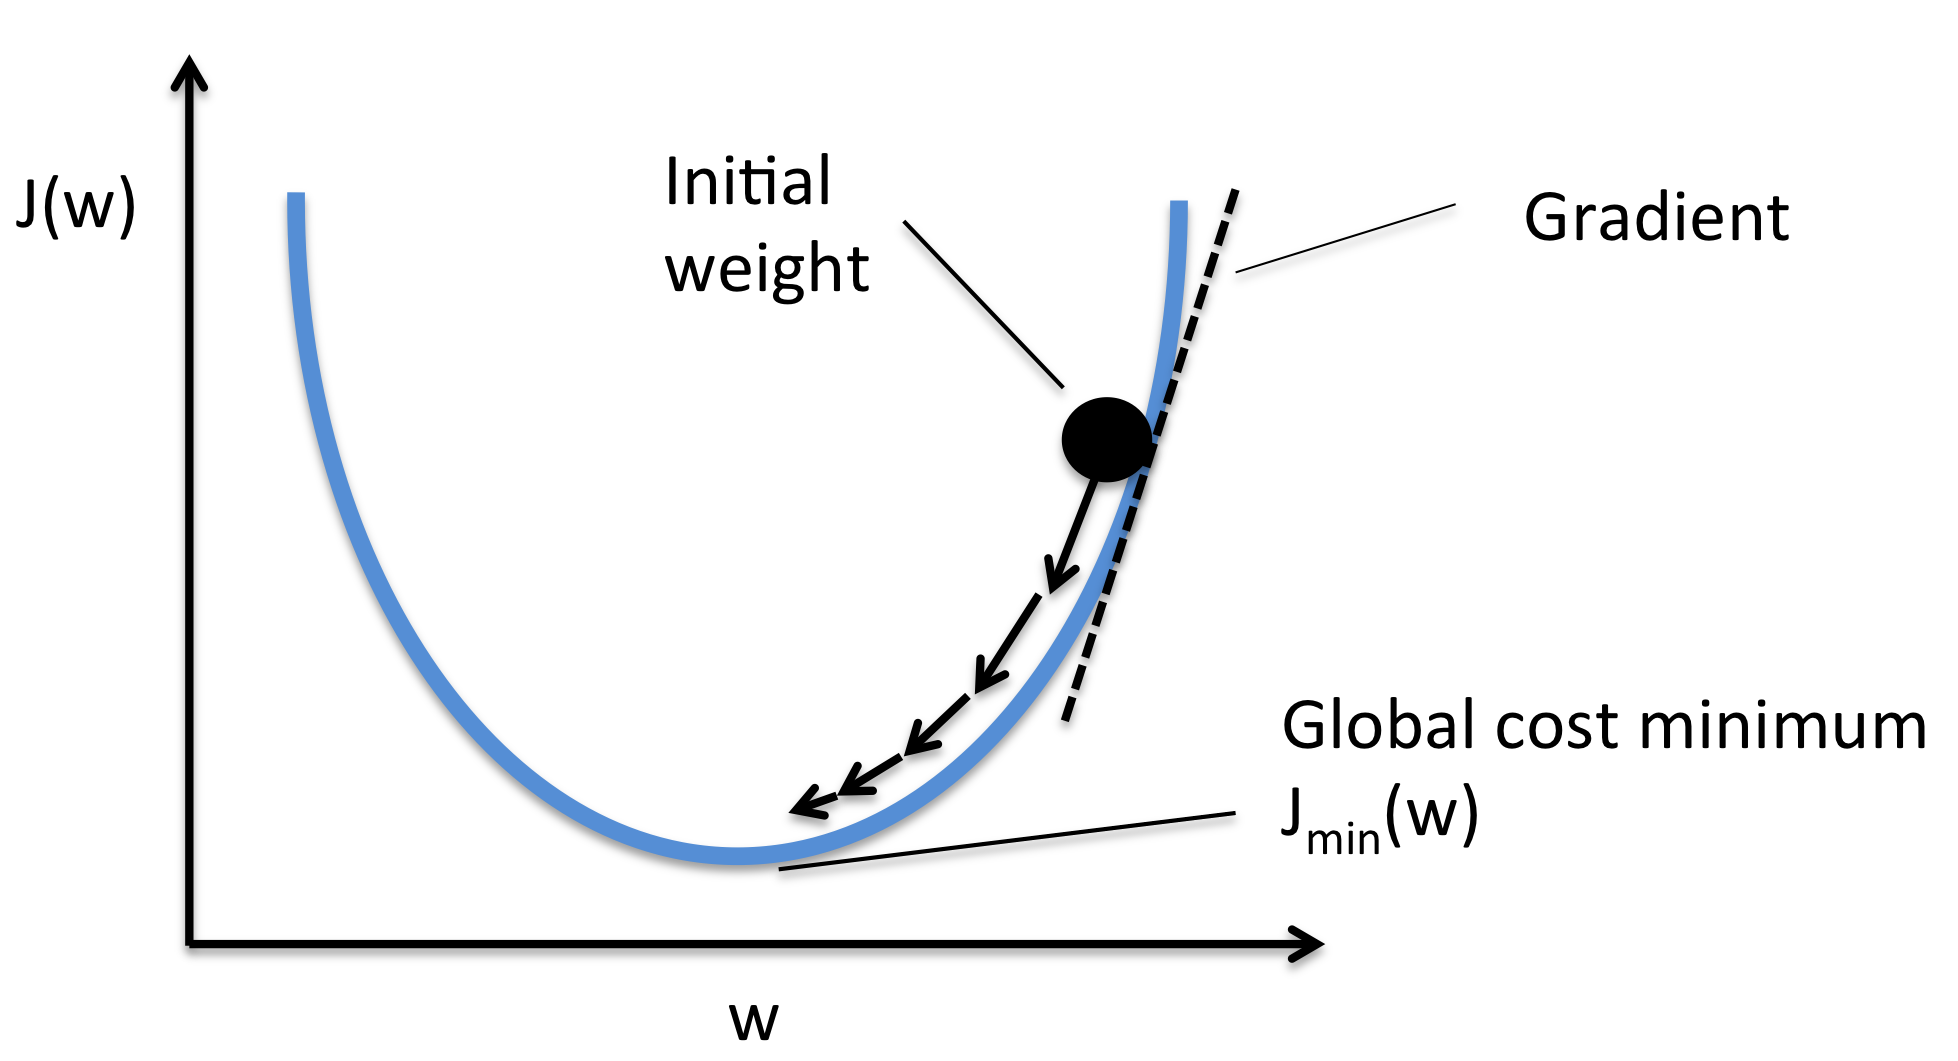


Gradient Descent is done for specified amount of iterations or done until the change in cost function is very less.

In [50]:
# Importing pre-implemented LogisticRegression algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [51]:
# Initializing the model with total iteration of 10000
logreg = LogisticRegression(max_iter=10000)

# Fiting data to the model
logreg.fit(X_train, y_train)

# Predict data from trained model 
y_pred_test = logreg.predict(X_test)

# Checking accuracy
print(f'Model accuracy score: {round(accuracy_score(y_test, y_pred_test) * 100, 2)}%')

Model accuracy score: 87.51%


Confusion matrix is a statistical measure that gives us count for correctly predicted values and incorrectly predicted values.

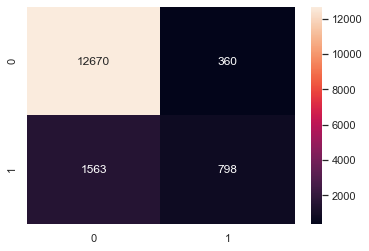

In [53]:
from sklearn.metrics import confusion_matrix

# TrueNeg, FalsePos, FalseNeg, TruePos
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
# Adding them to a 2d list
cm = [[tn, fp],[fn,tp]]

# Plotting them
sns.heatmap(cm, annot=True, fmt='g');


In [54]:
print("True Negative-->", tn)
print("False Negative-->", fn)
print("True Positive-->", tp)
print("False Positive-->", fp)

True Negative--> 12670
False Negative--> 1563
True Positive--> 798
False Positive--> 360


### ROC Curve

ROC Curve is a graph showing performance of a classification model with different threshold values. By default, the threshold value is 0.5. If we built a model to detect cancer patients, we would set the threshold very low, say 0.2, to catch all of the cancer patients.

### AUC

AUC, Area Under the Curve, gives the value of area under the ROC curve. The AUC value determines how well our model performs. Greater the value, better the model.

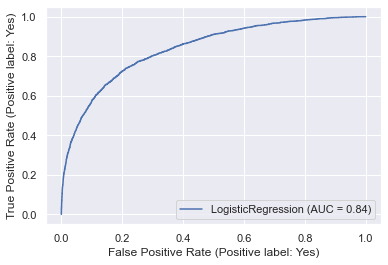

In [55]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(logreg, X_test, y_test);